In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

# 단순 선형 회귀모델

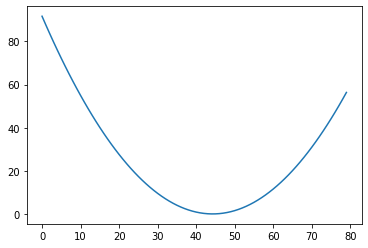

In [2]:
### 비용함수 그래프 그리기 ###

#1 데이터 준비
x_train = [1, 2, 3]  #> 입력값
y_train = [2, 3, 4]  #> 출력값. y=Wx+b

W = tf.placeholder(tf.float32)
    #> W에 한 자리 수 랜덤하게 넣어 값 찾기(정확한 값 위해 데이터 타입 지정)

#2 모델(가설) 준비(Wx + b 에서 단순화 위해 b 생략)
hypothsis = W * x_train

#3 cost(비용-lost) 구하는 함수 준비
cost = tf.reduce_mean(tf.square(hypothsis - y_train))

#4 비용 함수로 그래프 그리기: 경사 하강 알고리즘
sess = tf.Session()

W_val = []
cost_val = []
for i in range(-30, 50):
    curr_cost = sess.run(cost, feed_dict={W:i*0.1})  #> i의 이동 범위 좁히기 위해 0.1 곱함: 너무 크게 이동할 경우 NaN값 발생
    cost_val.append(curr_cost)
    
plt.plot(cost_val)

sess.close()

cost 구하는 공식(#3 참고)

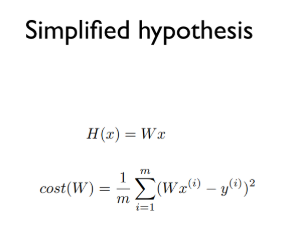

In [3]:
### 경사하강 알고리즘 이용한 가중치 학습 ###

#1 데이터 준비
x_train = [1, 2, 3]  #> 입력값
y_train = [1, 2, 3]  #> 출력값. y=Wx+b

W = tf.Variable(tf.random_normal([1]), tf.float32, name="weight")
    #> W에 한 자리 수 랜덤하게 넣어 값 찾기(정확한 값 위해 데이터 타입 지정)
b = tf.Variable(tf.random_normal([1]), tf.float32, name="bias")

#2 모델(가설) 준비(Wx + b 에서 단순화 위해 b 생략)
hypothsis = W * x_train

#3 cost(비용-lost) 구하는 함수 준비
cost = tf.reduce_mean(tf.square(hypothsis - y_train))

#4 최저 비용 학습을 위한 경사 하강 알고리즘
learning_late = 0.05  #> 아래로 0.01씩 이동(알파 변수): 비용값이 줄어드는 것 보기 위함
gradient = tf.reduce_mean((W * x_train - y_train) * x_train)
descent = W - learning_late * gradient
update = W.assign(descent)

#>>>>>>>>>>>>>>>>>>>>>>>>> graph 작업 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())  #> Variable() 사용 위한 초기화 작업

for step in range(21):
    _, curr_cost, curr_w = sess.run([update, cost, W])  #> _ : update에 대한 결과값은 필요 없으므로 받지 않는다
    print(step, curr_cost, curr_w)  #> 반복 횟수와 비용 출력

0 3.533847 [0.33284453]
1 2.0771167 [0.48851413]
2 1.2208831 [0.6078608]
3 0.717608 [0.69935995]
4 0.42179403 [0.7695093]
5 0.24792111 [0.82329047]
6 0.1457225 [0.8645227]
7 0.08565247 [0.8961341]
8 0.050344616 [0.92036945]
9 0.029591441 [0.9389499]
10 0.017393203 [0.9531949]
11 0.010223336 [0.9641161]
12 0.006009055 [0.972489]
13 0.003531984 [0.97890824]
14 0.0020760268 [0.9838297]
15 0.0012202389 [0.9876028]
16 0.00071722455 [0.99049544]
17 0.00042157076 [0.99271315]
18 0.00024779214 [0.99441344]
19 0.00014564462 [0.995717]
20 8.56067e-05 [0.9967164]


경사 하강 알고리즘(#4 참고) 공식

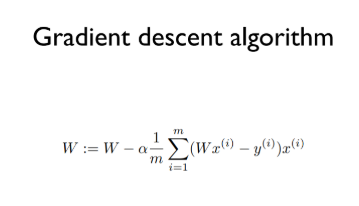

In [4]:
### 경사하강 알고리즘 이용한 가중치 학습(미리 데이터 입력x) ###

#1 데이터 준비
X = tf.placeholder(dtype=tf.float32, shape=[None])
y = tf.placeholder(dtype=tf.float32, shape=[None])  #> 데이터 입력 갯수에 상관 없이 처리

W = tf.Variable(tf.random_normal([1]), tf.float32, name="weight")
    #> W에 한 자리 수 랜덤하게 넣어 값 찾기(정확한 값 위해 데이터 타입 지정)
b = tf.Variable(tf.random_normal([1]), tf.float32, name="bias")

#2 모델(가설) 준비(Wx + b 에서 단순화 위해 b 생략)
hypothsis = W * X + b

#3 cost(비용-lost) 구하는 함수 준비
cost = tf.reduce_mean(tf.square(hypothsis - y))

#4 최저 비용 학습을 위한 경사 하강 알고리즘
learning_late = 0.1
gradient = tf.reduce_mean((W * X - y) * X)
descent = W - learning_late * gradient
update = W.assign(descent)

#>>>>>>>>>>>>>>>>>>>>>>>>> graph 작업 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())  #> Variable() 사용 위한 초기화 작업

for step in range(21):
    _, curr_cost, curr_w = sess.run([update, cost, W], feed_dict={X:[1, 2, 3, 4], y:[1, 2, 3, 4]})
        #> 미리 데이터 입력하지 않았으므로, 실행시 데이터 입력
    print(step, curr_cost, curr_w)  #> 반복 횟수와 비용 출력

0 42.374916 [0.43980765]
1 3.6566827 [0.859952]
2 0.59666985 [0.964988]
3 0.24538845 [0.991247]
4 0.18342566 [0.99781173]
5 0.16955113 [0.99945295]
6 0.16618344 [0.99986327]
7 0.16534774 [0.9999658]
8 0.16513935 [0.9999914]
9 0.1650873 [0.99999785]
10 0.16507423 [0.99999946]
11 0.16507098 [0.9999999]
12 0.16507013 [1.]
13 0.16506986 [1.]
14 0.16506986 [1.]
15 0.16506986 [1.]
16 0.16506986 [1.]
17 0.16506986 [1.]
18 0.16506986 [1.]
19 0.16506986 [1.]
20 0.16506986 [1.]


In [5]:
### 텐서플로우에서 제공하는 경사하강 알고리즘 이용한 가중치 학습 ###

#1 데이터 준비
X = tf.placeholder(dtype=tf.float32, shape=[None])
y = tf.placeholder(dtype=tf.float32, shape=[None])  #> 데이터 입력 갯수에 상관 없이 처리

W = tf.Variable(tf.random_normal([1]), tf.float32, name="weight")
    #> W에 한 자리 수 랜덤하게 넣어 값 찾기(정확한 값 위해 데이터 타입 지정)
b = tf.Variable(tf.random_normal([1]), tf.float32, name="bias")

#2 모델(가설) 준비(Wx + b 에서 단순화 위해 b 생략)
hypothsis = W * X + b

#3 cost(비용-lost) 구하는 함수 준비
cost = tf.reduce_mean(tf.square(hypothsis - y))

#4 최저 비용 학습을 위한 경사 하강 알고리즘: 함수 이용
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

#>>>>>>>>>>>>>>>>>>>>>>>>> graph 작업 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())  #> Variable() 사용 위한 초기화 작업

for step in range(2001):
    _, curr_cost, curr_w, curr_b = sess.run([train, cost, W, b], feed_dict={X:[1, 2, 3, 4, 5], y:[1, 2, 3, 4, 5]})
        #> 미리 데이터 입력하지 않았으므로, 실행시 데이터 입력
    if step % 100 == 0:
        print(step, curr_cost, curr_w, curr_b)  #> 100번에 한 번씩 출력

0 9.355993 [0.27388355] [0.08005246]
100 0.00634803 [0.9484478] [0.18611953]
200 0.003224579 [0.96325785] [0.13265078]
300 0.0016379844 [0.9738132] [0.09454259]
400 0.0008320453 [0.9813362] [0.06738229]
500 0.00042265264 [0.986698] [0.04802457]
600 0.00021469367 [0.9905194] [0.034228]
700 0.00010905648 [0.993243] [0.02439486]
800 5.539913e-05 [0.9951842] [0.01738677]
900 2.813916e-05 [0.99656767] [0.01239181]
1000 1.4294e-05 [0.99755377] [0.00883184]
1100 7.2608163e-06 [0.9982565] [0.00629462]
1200 3.6885504e-06 [0.9987574] [0.00448628]
1300 1.8735989e-06 [0.99911433] [0.00319747]
1400 9.5179047e-07 [0.9993687] [0.00227895]
1500 4.835455e-07 [0.9995501] [0.00162436]
1600 2.4566003e-07 [0.99967927] [0.00115782]
1700 1.2482289e-07 [0.99977136] [0.00082534]
1800 6.339258e-08 [0.99983704] [0.00058832]
1900 3.2232517e-08 [0.9998839] [0.00041937]
2000 1.6376783e-08 [0.9999172] [0.00029902]


In [6]:
#5 Testing
print(sess.run(hypothsis, feed_dict={X:[27]}))
print(sess.run(hypothsis, feed_dict={X:[2.5, 3.7]}))

[26.998064]
[2.500092  3.6999927]


In [7]:
#1 데이터 준비
X = tf.placeholder(dtype=tf.float32, shape=[None])
y = tf.placeholder(dtype=tf.float32, shape=[None])  #> 데이터 입력 갯수에 상관 없이 처리

W = tf.Variable(tf.random_normal([1]), tf.float32, name="weight")
    #> W에 한 자리 수 랜덤하게 넣어 값 찾기(정확한 값 위해 데이터 타입 지정)
b = tf.Variable(tf.random_normal([1]), tf.float32, name="bias")

#2 모델(가설) 준비(Wx + b)
hypothsis = W * X + b

#3 cost(비용-lost) 구하는 함수 준비
cost = tf.reduce_mean(tf.square(hypothsis - y))

#4 최저 비용 학습을 위한 경사 하강 알고리즘: 함수 이용
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

#>>>>>>>>>>>>>>>>>>>>>>>>> graph 작업 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())  #> Variable() 사용 위한 초기화 작업

for step in range(2001):
    _, curr_cost, curr_w, curr_b = sess.run([train, cost, W, b], feed_dict={X:[1, 2, 3, 4, 5], y:[2.1, 3.1, 4.1, 5.1, 6.1]})
        #> 미리 데이터 입력하지 않았으므로, 실행시 데이터 입력
    if step % 100 == 0:
        print(step, curr_cost, curr_w, curr_b)  #> 100번에 한 번씩 출력

0 58.41155 [-0.3102389] [-0.5106669]
100 0.12500897 [1.2287694] [0.27406996]
200 0.063500464 [1.163048] [0.5113445]
300 0.032256164 [1.1162074] [0.68045455]
400 0.016385084 [1.0828232] [0.80098224]
500 0.008323087 [1.0590295] [0.8868847]
600 0.0042278487 [1.0420715] [0.9481089]
700 0.0021476033 [1.029985] [0.9917445]
800 0.0010909088 [1.0213709] [1.0228446]
900 0.00055414357 [1.0152313] [1.0450101]
1000 0.00028149248 [1.0108558] [1.0608073]
1100 0.00014298642 [1.007737] [1.0720669]
1200 7.263564e-05 [1.0055144] [1.0800911]
1300 3.6895766e-05 [1.0039302] [1.0858107]
1400 1.8740055e-05 [1.0028011] [1.0898875]
1500 9.519035e-06 [1.0019963] [1.0927926]
1600 4.8353286e-06 [1.0014228] [1.094863]
1700 2.4565975e-06 [1.0010142] [1.0963384]
1800 1.2484256e-06 [1.0007229] [1.0973898]
1900 6.3412745e-07 [1.0005152] [1.0981395]
2000 3.2237995e-07 [1.0003674] [1.0986737]


In [8]:
#5 Testing
print(sess.run(hypothsis, feed_dict={X:[27]}))
print(sess.run(hypothsis, feed_dict={X:[2.5, 3.7]}))

sess.close()

[28.108593]
[3.5995922 4.800033 ]


### 예제

: 아래의 데이터를 가지고 하루 8시간을 일했을 때 매출액이 얼마인지 예측

In [9]:
x_data = [1, 2, 3, 4, 5, 6, 7]
y_data = [25000, 55000, 75000, 110000, 128000, 155000, 180000]

In [10]:
#1 데이터 준비
X = tf.placeholder(dtype=tf.float32, shape=[None])
y = tf.placeholder(dtype=tf.float32, shape=[None])

W = tf.Variable(tf.random_normal([1]), tf.float32, name="weight")
b = tf.Variable(tf.random_normal([1]), tf.float32, name="bias")

#2 모델(가설) 준비(Wx + b 에서 단순화 위해 b 생략)
hypothsis = W * X + b

#3 cost(비용-lost) 구하는 함수 준비
cost = tf.reduce_mean(tf.square(hypothsis - y))

#4 최저 비용 학습을 위한 경사 하강 알고리즘: 함수 이용
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

#>>>>>>>>>>>>>>>>>>>>>>>>> graph 작업 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())  #> Variable() 사용 위한 초기화 작업

for step in range(5001):
    sess.run(train, feed_dict={X:x_data, y:y_data})
    
    if step % 500 == 0:
        print(step, sess.run(cost, feed_dict={X:x_data, y:y_data}), sess.run(W), sess.run(b))

0 4593931000.0 [10370.879] [2081.6877]
500 8687430.0 [25537.193] [1951.8131]
1000 8633814.0 [25627.459] [1504.8202]
1500 8632682.0 [25640.613] [1439.684]
2000 8632655.0 [25642.531] [1430.1888]
2500 8632649.0 [25642.805] [1428.8201]
3000 8632657.0 [25642.844] [1428.633]
3500 8632656.0 [25642.848] [1428.6133]
4000 8632656.0 [25642.848] [1428.6133]
4500 8632656.0 [25642.848] [1428.6133]
5000 8632656.0 [25642.848] [1428.6133]


In [11]:
#5 Testing
print(sess.run(hypothsis, feed_dict={X:[8]}))

sess.close()

[206571.39]


---

# 다중 선형 회귀모델

In [12]:
x1_data = [73., 93., 89., 96., 73.]
x2_data = [80., 88., 91., 98., 66.]
x3_data = [75., 93., 90., 100., 70.]
y_data = [152., 185., 180., 196., 142.]

### 단순 처리 경우 ###

X1 = tf.placeholder(dtype=tf.float32, shape=[None])
X2 = tf.placeholder(dtype=tf.float32, shape=[None])
X3 = tf.placeholder(dtype=tf.float32, shape=[None])
y = tf.placeholder(dtype=tf.float32, shape=[None])

W1 = tf.Variable(tf.random_normal([1]))
W2 = tf.Variable(tf.random_normal([1]))
W3 = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

hypothesis = W1*X1 + W2*X2 + W3*X3 + b
cost = tf.reduce_mean(tf.square(hypothesis - y))

train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

with tf.Session() as sess:  #> sess.close() 하지 않아도 session 종료되도록 with문 사용
    sess.run(tf.global_variables_initializer())
    for step in range(2001):
        hy, cost_val, _ = sess.run([hypothesis, cost, train], feed_dict={X1:x1_data, X2:x2_data, X3:x3_data, y:y_data})
        
        if step % 100 == 0:
            print(step, cost_val, hy)

0 75683.02 [ -85.28865  -113.57596  -106.12666  -118.039024  -87.06907 ]
100 20.965046 [158.59714 179.89598 182.85947 196.68254 136.84155]
200 19.881042 [158.42194 180.01581 182.80544 196.64609 136.99661]
300 18.85424 [158.2514  180.13246 182.75285 196.61064 137.14746]
400 17.881512 [158.0854  180.24599 182.70166 196.57622 137.29428]
500 16.960043 [157.92381 180.3565  182.6518  196.54276 137.4371 ]
600 16.087074 [157.76651 180.46411 182.60327 196.51025 137.57608]
700 15.26018 [157.61339 180.56879 182.55602 196.47867 137.71132]
800 14.476787 [157.46432 180.67072 182.51    196.44795 137.84288]
900 13.734632 [157.31921 180.76993 182.46521 196.41814 137.97092]
1000 13.031534 [157.17795 180.86652 182.42159 196.38914 138.09547]
1100 12.36552 [157.04045 180.96051 182.37912 196.36101 138.21669]
1200 11.734522 [156.90659 181.05203 182.33777 196.33366 138.33461]
1300 11.136741 [156.77628 181.14111 182.2975  196.3071  138.44936]
1400 10.570509 [156.64943 181.2278  182.2583  196.2813  138.56099]
1

In [13]:
# x1_data = [73., 93., 89., 96., 73.]
# x2_data = [80., 88., 91., 98., 66.]
# x3_data = [75., 93., 90., 100., 70.]
# y_data = [152., 185., 180., 196., 142.]

x_data = [[73., 80., 75.], [93., 88., 93.], [89., 91., 90.], [96., 98., 100.], [73., 66., 70.]]
y_data = [[152.], [185.], [180.], [196.], [142.]]

### Matrix 이용하여 처리 경우 ###

X = tf.placeholder(dtype=tf.float32, shape=[None, 3])
y = tf.placeholder(dtype=tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]))  #> 입력과 출력의 갯수를 맞춘다
b = tf.Variable(tf.random_normal([1]))  #> 출력의 갯수를 맞춘다

hypothesis = tf.matmul(X, W) + b  #> 다중선형회귀모델의 가설: 행렬 곱으로
cost = tf.reduce_mean(tf.square(hypothesis - y))

train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

with tf.Session() as sess:  #> sess.close() 하지 않아도 session 종료되도록 with문 사용
    sess.run(tf.global_variables_initializer())
    for step in range(2001):
        hy, cost_val, _ = sess.run([hypothesis, cost, train], feed_dict={X:x_data, y:y_data})
        
        if step % 100 == 0:
            print(step, cost_val, hy)

0 109131.33 [[-135.1704 ]
 [-171.82721]
 [-164.04356]
 [-182.49176]
 [-130.47403]]
100 15.161618 [[157.77962]
 [180.55711]
 [183.02051]
 [195.4744 ]
 [138.35786]]
200 14.429814 [[157.63477]
 [180.65591]
 [182.97546]
 [195.44699]
 [138.48315]]
300 13.73631 [[157.49373]
 [180.75212]
 [182.9316 ]
 [195.42041]
 [138.60503]]
400 13.079195 [[157.3564 ]
 [180.84573]
 [182.88885]
 [195.39464]
 [138.72356]]
500 12.456413 [[157.22269]
 [180.93689]
 [182.8472 ]
 [195.36964]
 [138.83885]]
600 11.866282 [[157.09248]
 [181.02562]
 [182.80666]
 [195.34544]
 [138.95097]]
700 11.306998 [[156.9657 ]
 [181.11198]
 [182.76714]
 [195.32193]
 [139.06004]]
800 10.776931 [[156.84225]
 [181.19609]
 [182.72864]
 [195.29922]
 [139.1661 ]]
900 10.274593 [[156.72208]
 [181.27798]
 [182.69116]
 [195.27716]
 [139.2693 ]]
1000 9.798439 [[156.60503]
 [181.35773]
 [182.65466]
 [195.25584]
 [139.36964]]
1100 9.347201 [[156.49106]
 [181.43532]
 [182.61906]
 [195.23515]
 [139.46722]]
1200 8.91942 [[156.38008]
 [181.51091]

다중 선형 처리 공식(행렬 곱셈 이용)

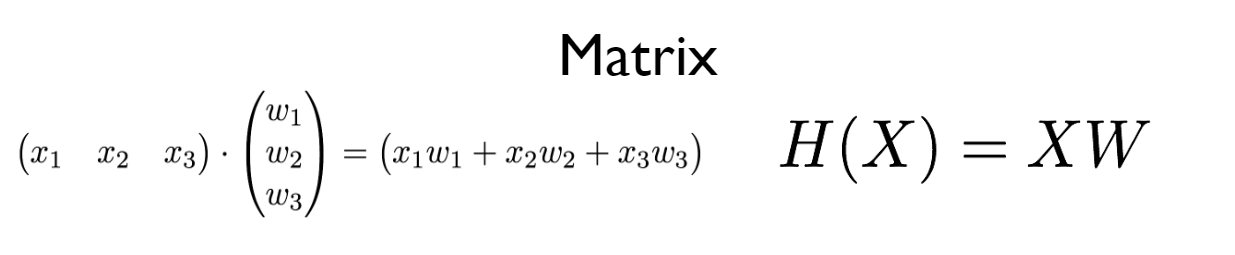

## Queue Runner

In [14]:
filename_queue = tf.train.string_input_producer(["data/data-01-test-score1.csv"])  
    #> 데이터 양이 크거나 많은 경우 사용(리스트로 묶는 이유)
key, value = tf.TextLineReader().read(filename_queue)

print(key)
print(value)

Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(string_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_epochs)`.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.TextLineDataset`.
Tensor("ReaderReadV2:0", shape=(), dt

In [15]:
xy = tf.decode_csv(value, record_defaults=[[0.], [0.], [0.], [0.]])

Batch : 일괄 처리 방법

1) Batch : 전체 데이터 처리 (데이터 아주 큰 경우 사용x)

2) Stochastic : 데이터 하나씩 처리 (속도는 빠르나 데이터 목적 파악x)

3) Mini-Batch : Batch와 Stochastic의 절충안 (가장 많이 사용)

ex> 200개의 샘플을 가진 훈련 데이터셋이 있다.
- batch 사이즈는 200으로 한다 : Batch. 데이터셋 1개
- batch 사이즈는 5로 한다 : Mini-Batch. 데이터셋 40개
- batch 사이즈는 1로 한다 : Stochastic. 데이터셋 200개

epoch : 전체 훈련 데이터셋을 반복해서 학습하는 횟수(전체 데이터 반복 주기)
- epoch 갯수는 1000이다 : 전체 수행개수 40000번(40개를 한 세트로 1000번 수행)

In [16]:
train_x_batch, train_y_batch = tf.train.batch([xy[0:-1], xy[-1:]], batch_size=10)

Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.batch(batch_size)` (or `padded_batch(...)` if `dynamic_pad=True`).


In [17]:
X = tf.placeholder(tf.float32, shape=[None, 3])
y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

hypothesis = tf.matmul(X, W) + b 
cost = tf.reduce_mean(tf.square(hypothesis - y))

train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

In [18]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    coord = tf.train.Coordinator()  
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)  #> 병렬처리 가능 메서드 - threads 관리(동시작업)
    
    for step in range(2001):
        x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
        sess.run(train, feed_dict={X:x_batch, y:y_batch})
    
    coord.request_stop()
    coord.join(threads)  #> 안전한 종료 위함
    
    print("당신의 성적은: ", sess.run(hypothesis, feed_dict={X:[[100, 70, 95]]}))
    print("다른 사람의 성적은: ", sess.run(hypothesis, feed_dict={X:[[60, 70, 90], [90, 100, 85]]}))

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
당신의 성적은:  [[177.85773]]
다른 사람의 성적은:  [[149.84164]
 [186.20949]]


---

# 로지스틱 회귀모델

In [19]:
X_data = [[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
y_data = [[0],[0],[0],[1],[1],[1]]

In [20]:
# 그래프 작업
X = tf.placeholder(tf.float32,shape=[None,2])
y = tf.placeholder(tf.float32,shape=[None,1])
W = tf.Variable(tf.random_normal([2,1]),name='weight')
b = tf.Variable(tf.random_normal([1]),name='bias')

hypothesis = tf.sigmoid(tf.matmul(X,W) + b)
cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)


predict = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.cast(tf.equal(predict,y), dtype=tf.float32)

In [21]:
# 그래프 실행
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train,feed_dict={X:X_data,y:y_data})
        
    h,p,a = sess.run([hypothesis,predict,accuracy],feed_dict={X:X_data,y:y_data})
    
print('가설',h,'\n예측',p,'\n정확도',a)

가설 [[0.03094164]
 [0.15911734]
 [0.30583286]
 [0.78094196]
 [0.9392976 ]
 [0.98007613]] 
예측 [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 
정확도 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


### 예제

: 당뇨병 예측

In [23]:
xy = np.loadtxt('data/data-03-diabetes.csv',delimiter=',',dtype=np.float32)
X_data = xy[:,0:-1]
y_data = xy[:,[-1]]

X = tf.placeholder(tf.float32,shape=[None,8])
y = tf.placeholder(tf.float32,shape=[None,1])
W = tf.Variable(tf.random_normal([8,1]),name='weight')
b = tf.Variable(tf.random_normal([1]),name='bias')

hypothesis = tf.sigmoid(tf.matmul(X,W) + b)
cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

predict = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.cast(tf.equal(predict,y), dtype=tf.float32)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train,feed_dict={X:X_data,y:y_data})
        
        
    h,p,a = sess.run([hypothesis,predict,accuracy],feed_dict={X:X_data,y:y_data})
    
print('가설',h,'\n예측',p,'\n정확도',a)

가설 [[0.47168842]
 [0.92680883]
 [0.15862182]
 [0.95802903]
 [0.36400202]
 [0.67265916]
 [0.9524143 ]
 [0.6120936 ]
 [0.23303789]
 [0.4889152 ]
 [0.62794787]
 [0.16275564]
 [0.27314526]
 [0.38296697]
 [0.74550724]
 [0.47865295]
 [0.6799605 ]
 [0.9312782 ]
 [0.8263155 ]
 [0.5361705 ]
 [0.692583  ]
 [0.08194476]
 [0.5973214 ]
 [0.7076618 ]
 [0.37826025]
 [0.92638135]
 [0.55580497]
 [0.56764275]
 [0.8128558 ]
 [0.3761959 ]
 [0.95459783]
 [0.7506013 ]
 [0.5990933 ]
 [0.8308697 ]
 [0.33393946]
 [0.70403683]
 [0.84385324]
 [0.6613634 ]
 [0.42553487]
 [0.3637345 ]
 [0.8113377 ]
 [0.17390981]
 [0.36342382]
 [0.07704052]
 [0.5466713 ]
 [0.92987394]
 [0.7749902 ]
 [0.70804316]
 [0.9061364 ]
 [0.94209063]
 [0.92985106]
 [0.23556757]
 [0.3973509 ]
 [0.98155475]
 [0.21881008]
 [0.4846325 ]
 [0.16345438]
 [0.74073035]
 [0.9096214 ]
 [0.4862397 ]
 [0.95325804]
 [0.6650696 ]
 [0.6847846 ]
 [0.848688  ]
 [0.60372823]
 [0.63783395]
 [0.9472348 ]
 [0.5846174 ]
 [0.88089633]
 [0.6233228 ]
 [0.29137135]
 [0

# SoftMax Classifier

In [24]:
x_data = [[1, 2, 1, 1], 
          [2, 1, 3, 2], 
          [3, 1, 3, 4], 
          [4, 1, 5, 5], 
          [1, 7, 5, 5],                                               
          [1, 2, 5, 6], 
          [1, 6, 6, 6], 
          [1, 7, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

In [25]:
X = tf.placeholder(tf.float32,shape=[None,4])
y = tf.placeholder(tf.float32,shape=[None,3])

W = tf.Variable(tf.random_normal([4,3]),name='weight')
b = tf.Variable(tf.random_normal([3]),name='bias')

hypothesis = tf.nn.softmax(tf.matmul(X,W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(hypothesis),axis=1))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(2001):
        sess.run(train,feed_dict={X:x_data,y:y_data})
        
    a = sess.run(hypothesis, feed_dict={X:[[1,11,7,9]]})
    print(a)

[[0.8847196  0.11360322 0.00167715]]


### Fancy Softmax 

    - softmax_cross_entropy_with_logits
    
    - one_hot
    
    - reshape

In [26]:
X = tf.placeholder(tf.float32,shape=[None,4])
y = tf.placeholder(tf.float32,shape=[None,3])

W = tf.Variable(tf.random_normal([4,3]),name='weight')
b = tf.Variable(tf.random_normal([3]),name='bias')

logits = tf.matmul(X,W)+b
hypothesis = tf.nn.softmax(logits)
cost = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = y_data)

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(2001):
        sess.run(train,feed_dict={X:x_data,y:y_data})
        
    a = sess.run(hypothesis, feed_dict={X:[[1,11,7,9]]})
    print(a)
    print(a, sess.run(tf.arg_max(a,1)))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

[[3.4751132e-02 9.6522874e-01 2.0086905e-05]]
Instructions for updating:
Use `tf.math.argmax` instead
[[3.4751132e-02 9.6522874e-01 2.0086905e-05]] [1]


### 예제

: one_hot encoding 이용한 동물 분류

In [27]:
xy = np.loadtxt('data/data-04-zoo.csv',delimiter=',',dtype=np.float32)
X_data = xy[:,0:-1]
y_data = xy[:,[-1]]

In [29]:
X = tf.placeholder(tf.float32, shape=[None,16])
y = tf.placeholder(tf.int64, shape=[None,1])

y_one_hot = tf.one_hot(y, 7)
y_one_hot = tf.reshape(y_one_hot, [-1, 7])  #> one_hot 사용시 차원이 증가하므로 reshape

W = tf.Variable(tf.random_normal([16,7]),name='weight')
b = tf.Variable(tf.random_normal([7]),name='bias')

In [32]:
logits = tf.matmul(X,W)+b
hypothesis = tf.nn.softmax(logits)

cost = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = y_one_hot)

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

predict = tf.argmax(hypothesis, 1)
correct_pred = tf.equal(predict,tf.argmax(y_one_hot,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [33]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2001):
        sess.run(train, feed_dict={X:X_data, y:y_data})
        
    pred = sess.run(predict, feed_dict={X:X_data})
    for p, y in zip(pred, y_data.flatten()):
        print("[{}] prediction:{} True Y:{}" .format(p==int(y), p, int(y)))

[True] prediction:0 True Y:0
[True] prediction:0 True Y:0
[True] prediction:3 True Y:3
[True] prediction:0 True Y:0
[True] prediction:0 True Y:0
[True] prediction:0 True Y:0
[True] prediction:0 True Y:0
[True] prediction:3 True Y:3
[True] prediction:3 True Y:3
[True] prediction:0 True Y:0
[True] prediction:0 True Y:0
[True] prediction:1 True Y:1
[True] prediction:3 True Y:3
[True] prediction:6 True Y:6
[True] prediction:6 True Y:6
[True] prediction:6 True Y:6
[True] prediction:1 True Y:1
[True] prediction:0 True Y:0
[True] prediction:3 True Y:3
[True] prediction:0 True Y:0
[True] prediction:1 True Y:1
[True] prediction:1 True Y:1
[True] prediction:0 True Y:0
[True] prediction:1 True Y:1
[True] prediction:5 True Y:5
[True] prediction:4 True Y:4
[True] prediction:4 True Y:4
[True] prediction:0 True Y:0
[True] prediction:0 True Y:0
[True] prediction:0 True Y:0
[True] prediction:5 True Y:5
[True] prediction:0 True Y:0
[True] prediction:0 True Y:0
[True] prediction:1 True Y:1
[True] predict

### 예제
: 숫자 이미지(MNIST) 예측

In [35]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("data/MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official

In [42]:
type(mnist)
dir(mnist.train)
mnist.train.labels
mnist.train.num_examples

55000

In [44]:
X = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape=[None, 10])

W = tf.Variable(tf.random_normal([784, 10]),name='weight')  #> [입력갯수, 출력갯수]
b = tf.Variable(tf.random_normal([10]),name='bias')

logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)
cost = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y)
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

is_corrected = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(y, 1))  #> 두 개가 같은지 다른지 확인
accuracy = tf.reduce_mean(tf.cast(is_corrected, tf.float32))

In [45]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

training_epochs = 15
batch_size = 100

for epoch in range(training_epochs):
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)  #> 전체 데이터를 100개씩(batch_size) 나눠서 가져온다
        sess.run(train, feed_dict={X:batch_xs, y:batch_ys})

In [46]:
print("정확도: ", sess.run(accuracy, feed_dict={X:mnist.test.images, y:mnist.test.labels}))

정확도:  0.9119


In [88]:
import random 

r = random.randint(0, mnist.test.num_examples-1)  #> 전체 테스트 이미지 중 하나만 출력
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))

Label:  [3]


In [90]:
print("예측: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X:mnist.test.images[r:r+1]}))

예측:  [5]


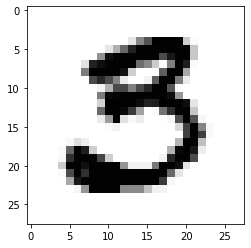

In [91]:
plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap="Greys")  #> 라벨값 이미지로 확인